# LLM Actions and Structure Messages

## Review

We built a simple graph with nodes, normal edges, and conditional edges.

## Goals

Now, let's understand the power of Actions with AI Models and before that structure our prompts.

## Messages

Chat models can use [`messages`](https://python.langchain.com/v0.2/docs/concepts/#messages), which capture different roles within a conversation.

LangChain supports various message types, including `HumanMessage`, `AIMessage`, `SystemMessage`, and `ToolMessage`.

These represent a message from the user, from chat model, for the chat model to instruct behavior, and from a tool call.

Let's create a list of messages.

Each message can be supplied with a few things:

* `content` - content of the message
* `name` - optionally, a message author
* `response_metadata` - optionally, a dict of metadata (e.g., often populated by model provider for `AIMessages`)

In [2]:
from pprint import pprint
from typing import Dict

from langchain_core.messages import AIMessage, HumanMessage, SystemMessage

# Creating History of Messages

messages = [AIMessage(content=f"So you said you were researching ocean mammals?", name="Model")]
messages.append(HumanMessage(content=f"Yes, that's right.",name="Lance"))
messages.append(AIMessage(content=f"Great, what would you like to learn about.", name="Model"))
messages.append(HumanMessage(content=f"I want to learn about the best place to see Orcas in the US.", name="Lance"))

for m in messages:
    m.pretty_print()

================================== Ai Message ==================================
Name: Model

So you said you were researching ocean mammals?
================================ Human Message =================================
Name: Lance

Yes, that's right.
================================== Ai Message ==================================
Name: Model

Great, what would you like to learn about.
================================ Human Message =================================
Name: Lance

I want to learn about the best place to see Orcas in the US.


From now let's use HumanMessage to pass our Prompt to Model

In [3]:
from dotenv import load_dotenv
import os
load_dotenv(r"H:\My_LangGraph_toturial\.env")

def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = os.getenv(var)

_set_env("OPENAI_API_KEY")
print(os.getenv("OPENAI_API_KEY)"))



None


In [16]:
%pip install -q -U langchain-openai

Note: you may need to restart the kernel to use updated packages.


In [5]:
from langchain_openai import ChatOpenAI
from langchain_core.messages import AIMessage
from langchain_core.messages import HumanMessage
openai_api_key = os.getenv("OPENAI_API_KEY")
# Initialize an instance of the ChatGoogleGenerativeAI with specific parameters
from langchain_openai import ChatOpenAI

llm :ChatOpenAI = ChatOpenAI(
    model="gpt-3.5-turbo-0125",
    temperature=0,
    max_tokens=50,
    timeout=None,
    max_retries=2,
    api_key= openai_api_key,
)

In [6]:
simple_call = llm.invoke("Hi")
print(simple_call)

content='Hello! How can I assist you today?' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 8, 'total_tokens': 18, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None} id='run-0ede1f85-6dad-49c5-990b-a5e1dd05d604-0' usage_metadata={'input_tokens': 8, 'output_tokens': 10, 'total_tokens': 18, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}


In [7]:
messages = [HumanMessage(content="What is your name?")]
result = llm.invoke(messages)
print(result)

content='I am an AI digital assistant and I do not have a personal name. You can simply refer to me as Assistant. How can I assist you today?' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 32, 'prompt_tokens': 12, 'total_tokens': 44, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None} id='run-4fad2cfe-8f69-4137-a1b2-26d0d3b08d89-0' usage_metadata={'input_tokens': 12, 'output_tokens': 32, 'total_tokens': 44, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}


In [8]:
system_human_message = [
                SystemMessage(content="You are a helpful assistant! Your name is Bob."),
                HumanMessage(content="What is your name?")
            ]
result = llm.invoke(system_human_message)
print(result)

 

content='Hello! My name is Bob. How can I assist you today?' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 27, 'total_tokens': 42, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None} id='run-6ce5fa21-0ece-45a2-b924-53438077b009-0' usage_metadata={'input_tokens': 27, 'output_tokens': 15, 'total_tokens': 42, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}


In [9]:
context_call = llm.invoke(messages)
print(context_call)

content='I am a language model AI created by OpenAI, so I do not have a personal name. You can call me Assistant or AI. How can I assist you today?' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 36, 'prompt_tokens': 12, 'total_tokens': 48, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None} id='run-9a09d9e2-dca9-4196-ba32-14aa70bddd19-0' usage_metadata={'input_tokens': 12, 'output_tokens': 36, 'total_tokens': 48, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}


## Tools

Tools are useful whenever you want a model to interact with external systems.

External systems (e.g., APIs) often require a particular input schema or payload, rather than natural language.

When we bind an API, for example, as a tool we given the model awareness of the required input schema.

The model will choose to call a tool based upon the natural language input from the user.

And, it will return an output that adheres to the tool's schema.

[Many LLM providers support tool calling](https://python.langchain.com/v0.1/docs/integrations/chat/) and [tool calling interface](https://blog.langchain.dev/improving-core-tool-interfaces-and-docs-in-langchain/) in LangChain is simple.

You can simply pass any Python `function` into `ChatModel.bind_tools(function)`.

![Screenshot 2024-08-19 at 7.46.28 PM.png](https://cdn.prod.website-files.com/65b8cd72835ceeacd4449a53/66dbab08dc1c17a7a57f9960_chain2.png)

In [10]:
%%capture --no-stderr
%pip install --quiet -U langchain_core langgraph

In [37]:
llm :ChatOpenAI = ChatOpenAI(
    model="gpt-3.5-turbo-0125",
    temperature=0,
    max_tokens=20,
    timeout=None,
    max_retries=2,
    api_key= openai_api_key,
)

## Tool Calling

In [12]:
print("\n\nllm\n", llm, "\n\n\n")



llm
 client=<openai.resources.chat.completions.completions.Completions object at 0x0000023707C8E620> async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x0000023707C8CEB0> root_client=<openai.OpenAI object at 0x0000023707C8FC10> root_async_client=<openai.AsyncOpenAI object at 0x0000023707C8CDC0> model_name='gpt-3.5-turbo-0125' temperature=0.0 model_kwargs={} openai_api_key=SecretStr('**********') max_retries=2 max_tokens=50 





In [22]:
def deposit_money(name: str, amount:int,  bank_account_no: int) -> dict[str, str]:
    """Deposit Money in Bank account.

    Args:
        name: Account holder name
        amount : Amount to deposit
        bank_account_no: customer bank account number

    Returns:
        dict: {"status": "Deposit Successful in {name} Account"}
    """
    # BUSINESS LOGIC for Bank Deposit
    # ......
    return {"status": f"Deposited {amount} Successfully in {name} Account"}

deposit_money("Zakir", 5000, 12345)

{'status': 'Deposited 5000 Successfully in Zakir Account'}

In [23]:
llm_with_tools_depo = llm.bind_tools([deposit_money])

In [24]:
llm_with_tools_depo

RunnableBinding(bound=ChatOpenAI(client=<openai.resources.chat.completions.completions.Completions object at 0x0000023707C8E620>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x0000023707C8CEB0>, root_client=<openai.OpenAI object at 0x0000023707C8FC10>, root_async_client=<openai.AsyncOpenAI object at 0x0000023707C8CDC0>, model_name='gpt-3.5-turbo-0125', temperature=0.0, model_kwargs={}, openai_api_key=SecretStr('**********'), max_retries=2, max_tokens=50), kwargs={'tools': [{'type': 'function', 'function': {'name': 'deposit_money', 'description': 'Deposit Money in Bank account.', 'parameters': {'properties': {'name': {'description': 'Account holder name', 'type': 'string'}, 'amount': {'description': 'Amount to deposit', 'type': 'integer'}, 'bank_account_no': {'description': 'customer bank account number', 'type': 'integer'}}, 'required': ['name', 'amount', 'bank_account_no'], 'type': 'object'}}}]}, config={}, config_factories=[])

In [26]:
from langchain_core.messages import HumanMessage
# llm without tools
call = llm.invoke(
    [HumanMessage(content=f"Deposit 40$ in Zakir Account. His acc number is 00123", name="Muhammad")])
call


AIMessage(content="I'm sorry, but I am not able to perform financial transactions. Please visit your bank or use an online banking service to deposit the money into Zakir's account.", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 35, 'prompt_tokens': 27, 'total_tokens': 62, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-407c92be-cfdd-4cfc-9792-b62c99a0e744-0', usage_metadata={'input_tokens': 27, 'output_tokens': 35, 'total_tokens': 62, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [28]:
call = llm_with_tools_depo.invoke(
    [HumanMessage(content=f"Deposit 40$ Money in Ahmad Account. His acc number is 00123", name="Muhammad")])
call

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_pHscTfN30szO16OUtAldhMG4', 'function': {'arguments': '{"name":"Zakir","amount":40,"bank_account_no":123}', 'name': 'deposit_money'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 28, 'prompt_tokens': 96, 'total_tokens': 124, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-4955585a-e8d6-4db5-ab5d-fc760b466fee-0', tool_calls=[{'name': 'deposit_money', 'args': {'name': 'Zakir', 'amount': 40, 'bank_account_no': 123}, 'id': 'call_pHscTfN30szO16OUtAldhMG4', 'type': 'tool_call'}], usage_metadata={'input_tokens': 96, 'output_tokens': 28, 'total_tokens': 124, 'input_token_details': {'audio': 0, 'cache_r

In [34]:
# We have an LLM Capable of Tool Calling: using bind_tools

# Now Lets do the Orchestration Through LangGraph

# 0.  State

from typing_extensions import TypedDict

class LastMessageState(TypedDict):
  messages: list

# 1. tool calling llm Node
def call_llm(state: LastMessageState):
  prompt = state["messages"]
  call_response = llm_with_tools_depo.invoke(prompt)
  # messages.append(call_response)

  # return {"messages": messages}
  return {"messages": [call_response]}  # overriding the messages , message is a list , so we are returning a list


mssg = [
            SystemMessage(content="you are a helpful assistant! Your name is Bob."),
            HumanMessage(content="What is your name?")]

call_llm(state= {"messages": mssg})


{'messages': [AIMessage(content='My name is Bob. How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 14, 'prompt_tokens': 87, 'total_tokens': 101, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-7536d092-2e18-4c6a-b82f-a205f17879dd-0', usage_metadata={'input_tokens': 87, 'output_tokens': 14, 'total_tokens': 101, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}

### Building Graph

In [38]:
# 2. Graph
from langgraph.graph import StateGraph, START, END

builder: StateGraph = StateGraph(LastMessageState)

# define nodes
builder.add_node("call_llm_with_tools", call_llm)

# define edges
builder.add_edge(START, "call_llm_with_tools")
builder.add_edge("call_llm_with_tools", END)

# build graph
graph = builder.compile()


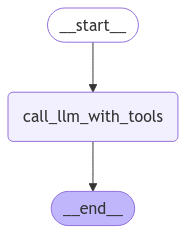

In [39]:
from IPython.display import display, Image

display(Image(graph.get_graph().draw_mermaid_png()))

In [40]:
graph.invoke({"messages": [HumanMessage(content="Hi")]})

{'messages': [AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 72, 'total_tokens': 83, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-a0489ea0-ee68-4601-b0fc-1463eee5b2d8-0', usage_metadata={'input_tokens': 72, 'output_tokens': 11, 'total_tokens': 83, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}

In [41]:
graph.invoke({"messages": [HumanMessage(content="Deposiut 7000 in Ahmad Account - his bank num is 001")]})

{'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_kPhDaG0lLsqjQbZGwqaV43Wz', 'function': {'arguments': '{"name":"Ahmad","amount":7000,"bank_account_no":1}', 'name': 'deposit_money'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 28, 'prompt_tokens': 87, 'total_tokens': 115, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-dc8d3b94-aa98-4943-9c00-408459b94de9-0', tool_calls=[{'name': 'deposit_money', 'args': {'name': 'Ahmad', 'amount': 7000, 'bank_account_no': 1}, 'id': 'call_kPhDaG0lLsqjQbZGwqaV43Wz', 'type': 'tool_call'}], usage_metadata={'input_tokens': 87, 'output_tokens': 28, 'total_tokens': 115, 'input_token_details': {'audio

#### Current Flow 

- LLM: Call this Tool
- System: Called Tool and told LLM the result.

#### Issue ??: Where is my Human Message 

Right now in response we only have AIMessage

#### Solutions:

- Proposal 1: manually Add Messages in call_llm using llm
- Proposal 2: Reducer Functions to Keep History Context